In [1]:
## Run this cell when using google colab

# from google.colab import files
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
# #For saving to Google Drive
# from google.colab import drive
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# Gdrive = GoogleDrive(gauth)
 
# drive.mount('/content/drive',force_remount=True)

# Delta-X Applications Workshop#
### This project is funded by JPL under contract with NASA.
### The NASA Delta-X project is funded by the Science Mission Directorate’s Earth Science Division through the Earth Venture Suborbital-3 Program NNH17ZDA001N-EVS3.

### © 2022 California Institute of Technology. Government sponsorship acknowledged.

#### Jupyter notebooks presented and prepared by:
Talib Oliver-Cabrera, NASA Jet Propulsion Laboratory
(talib.oliver.cabrera@jpl.nasa.gov)

#### Dataset Autors:
- Cathleen Jones, NASA Jet Propulsion Laboratory
- Marc Simard, NASA Jet Propulsion Laboratory
- Yunling Lou, NASA Jet Propulsion Laboratory
- Talib Oliver-Cabrera, NASA Jet Propulsion Laboratory

#### Dataset Citation:
Jones, C., T. Oliver-Cabrera, M. Simard, and Y. Lou. 2022. Delta-X: UAVSAR L1B Interferometric Products, MRD, Louisiana, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1979

Jones, C., T. Oliver-cabrera, M. Simard, and Y. Lou. 2022. Delta-X: UAVSAR Level 2 Geocoded Interferometric Products, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2057

## Exploring L1B interferogram products ##
In this notebook we take a look at the L1B interferometric products generated from the L1 SLC UAVSAR Delta-X acquisitions. 

    L1B products can be found at: https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1979
    
 <p align="left">
  <img width="600" src="images/l1b_main.png">
</p>     
<p style="text-align: center;">
    (ORNL L1B data)
</p>

    The user guide contains detailled explanation of the L1B delivery, it includes information on processing details, data format, layer information etc (https://daac.ornl.gov/DELTAX/guides/DeltaX_L1B_UAVSAR_WaterLevels.html). 
    
 <p align="left">
  <img width="600" src="images/l1b_doc.png">
</p>     
<p style="text-align: center;">
    (L1B data doumentation)
</p>



## Radar interferometry (InSAR)
Synthetic Aperture Radar (SAR) is a type of radar, generally mounted on a space or airborne platform. This system uses the platform flying path to simulate a very large antenna and produce high-resolution images. Interferometric synthetic aperture radar (InSAR) is a remote sensing technique that uses the difference of phase return between to SAR acquisitions taken over a same location in different time periods. Since SAR sensors are often mounted in satellite platforms, the InSAR technique is commonly used to observe changes in the Earth’s surface (Bürgmann et al., 20000; Hansen et al., 2001; Rosen et al., 2000). 
    
 <p align="left">
  <img width="600" src="images/insar.png">
</p>     
<p style="text-align: center;">
    (Illustration explaining InSAR; source volcano.si.edu)
</p>

InSAR is widely used to observe geophysical and environmental phenomena. In wetland environments, it can provide spatially extensive water level change measurements by taking advantage of the double-bounce scattering of the radar pulses with the water surface and emergent vegetation. It can be used as a monitoring tool to observe and characterize water level change and patterns across wetlands, spatially complementing water level gauge information.

 <p align="left">
  <img width="600" src="images/double_bounce_liao2020.png">
</p>     
<p style="text-align: center;">
    (Double bounce scattering illustration; source Liao et al., 2020)
</p>


The technique is dependent on the double-bounce scattering provided by wetland emergent vegetation. Thus, the approach is highly sensitive to surface changes in water or vegetation that lead to loss of interferometric coherence.

 <p align="left">
  <img width="300" src="images/insar_lu2008.png">
</p>     
<p style="text-align: center;">
    (Wetland InSAR example, source; Lu et al., 2008)
</p>

Delta-X takes advantage of the rapid-repeat acquisitions from the Uninhabited Aerial Vehicle Synthetic Aperture Radar UAVSAR (L-band) to generate interferometric products to provide spatially extensive water level change measurements within areas with emergent vegetation. 

 <p align="left">
  <img width="900" src="images/uavsar_insar.png">
</p>     
<p style="text-align: center;">
    (Delta-X UAVSAR InSAR, source; Oliver Cabrera JPL)
</p>


### Delta-X UAVSAR InSAR L1B data overview
This dataset contains UAVSAR Level 1B (L1B) interferometric products for Delta-X flight lines acquired during the spring and fall deployments 2021-03-27 to 2021-04-18 and 09/03/2021 to 09/13/2021. The study area includes the Atchafalaya Basin, in Southern Louisiana, USA, within the Mississippi River Delta (MRD) floodplain. 

 <p align="left">
  <img width="600" src="images/uavsar_datacover.png">
</p>     
<p style="text-align: center;">
    (UAVSAR data coverage)
</p>

A set of nearest-neighbor (NN), NN+1, and NN+2 co-registered VV-polarization interferograms were generated from the quad-polarization SLC stack level-1 (L1) product using a combination of the InSAR Scientific Computing Environment (ISCE)(Rosen et al., 2012), the statistical-cost, network-flow algorithm for phase unwrapping (SNAPHU)(Chen et al., 2001), and previously developed python code. The data are provided in non-georeferenced ENVI file format and include:
- Interferometric amplitude 
- Wrapped interferometric phase 
- Interferometric coherence 
- Unwrapped interferometric phase products.

 <p align="left">
  <img width="600" src="images/uavsar_L1b_browse_image.png">
</p>     
<p style="text-align: center;">
    (UAVSAR L1B products)
</p>

InSAR measurements quantify surface changes in cycles of 2$\pi$. To be able to know the rate of change in metric units, we most quantify the number of cycles within an area on a interferogram. This process is know as phase unwrapping.

 <p align="left">
  <img width="600" src="images/unwp_illustration.png"> 
</p> 
<p style="text-align: center;">
    (Phase unwrapping illustration)
</p>


### Download sample data
Download sample data from ORNL.

 <p align="left">
  <img width="600" src="images/deltax_l1b_data_search.png"> 
</p> 
<p style="text-align: center;">
    (data used in this example)
</p>

### L1b Data Characteristics

#### Data File Information
This dataset includes a total of 1,924 files in ENVI binary image and associated header file format: 481 interferogram phase, 481 interferogram amplitude, 481 coherence, and 481 unwrapped interferogram phase. Each ENVI consist of a binary data file (*.dat) plus a metadata header file (*.hdr); the data file and its associated header are provided in a zip archive (*.zip).

- Spatial Coverage:  Atchafalaya River and Terrebonne Basins in southern Louisiana
- Spatial Resolution: 0.000063 degrees (approximately 6 m)
- Temporal Coverage:  2021-03-27 to 2021-04-18 and 2021-09-05 to 2021-09-13
- Temporal Resolution: estimates at 30-minute intervals
- File naming convention:
    The files are named ssssss_aaaaa_YYLLDDHHMM_yyllddhhmm_vv_product.zip (e.g., atchaf_06309_2103271342_2103271413_01_coh.zip), where
    ssssss = "atchaf", "eterre" or "wterre"; 6-character alphanumeric site name assigned to the UAVSAR flight line .
    aaaaa = 5-character flight line ID assigned to the UAVSAR flight line. The first 3 characters are the aircraft heading in degrees from North, and the last 2 characters are an alphanumeric counter chosen to ensure uniqueness of the ID.
    YYLLDDHHMM = starting time of first acquisition, encoded as YY = the last two digits of the year, LL = month, DD = day of month, HH = hour, and MM = minute, in UTC.
    yyllddhhmm= start time of second acquisition, encoded as yy = the last two digits of the year, ll = month, dd = day of month, hh = hour, and mm = minute, in UTC.
    product = interferometric file type as "coh" = coherence, "intamp" = amplitude, "intphase" = phase, and "unwphase" = unwrapped phase.


### For this example we explore the L1B InSAR data
    1. Initialize the notebook using the necessary libraries. 
    2. Read rasters.
    3. Inspect interferometric coherence.
    4. Inspect wrapped phase.
    5. Inspect unwrapped phase.
    6. Generate coherence mask.
    7. Mask out water pixels from phase.
    8. Generate a profile from InSAR data.

### 1. Initialize the notebook using the necessary libraries. 

In [2]:
## 1. Initialize the notebook using the necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import gdal


### 2. Read rasters.

In [5]:
## 2. Read rasters.

#### define work directory for use in google colab ####
work_dir = '/content/drive/MyDrive/DeltaX_Workshop_2022/Tutorials/3_UAVSAR/data'

#### define local work directory if running in personal computer ####
# work_dir = '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data' 

os.chdir(work_dir)
print('Go to directory:', work_dir)

# Whats inside the data directory
!ls
# Separator for visual aid 
print('--------------------------')
# Whats inside the download
!ls uavsar_l1b/
# Separator for visual aid 
print('--------------------------')
# take a look at data info usign gdal
!gdalinfo uavsar_l1b/wterre_34202_2104061800_2104062032_01_intphase.dat


Go to directory: /Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data
uavsar_l1  uavsar_l1b uavsar_l2  uavsar_l3
--------------------------
wterre_34202_2104061800_2104062032_01_coh.dat
wterre_34202_2104061800_2104062032_01_coh.hdr
wterre_34202_2104061800_2104062032_01_intamp.dat
wterre_34202_2104061800_2104062032_01_intamp.hdr
wterre_34202_2104061800_2104062032_01_intphase.dat
wterre_34202_2104061800_2104062032_01_intphase.hdr
wterre_34202_2104061800_2104062032_01_unwphase.dat
wterre_34202_2104061800_2104062032_01_unwphase.hdr
--------------------------
Driver: ENVI/ENVI .hdr Labelled
Files: uavsar_l1b/wterre_34202_2104061800_2104062032_01_intphase.dat
       uavsar_l1b/wterre_34202_2104061800_2104062032_01_intphase.hdr
Size is 3300, 10172
Coordinate System is `'
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,10172.0)
Upper Right ( 3300.0,    0.0)
Lower Right ( 3300.0,10172.0)
Center      ( 1650.0, 5086.0)

In [6]:
# Read rasters

amp_path = 'uavsar_l1b/wterre_34202_2104061800_2104062032_01_intamp.dat'
ds = gdal.Open(amp_path, gdal.GA_ReadOnly)
amp = ds.GetRasterBand(1).ReadAsArray()
ds = None

int_path = 'uavsar_l1b/wterre_34202_2104061800_2104062032_01_intphase.dat'
ds = gdal.Open(int_path, gdal.GA_ReadOnly)
w_int = ds.GetRasterBand(1).ReadAsArray()
ds = None

coh_path = 'uavsar_l1b/wterre_34202_2104061800_2104062032_01_coh.dat'
ds = gdal.Open(coh_path, gdal.GA_ReadOnly)
coh = ds.GetRasterBand(1).ReadAsArray()
ds = None

ds = gdal.Open("uavsar_l1b/wterre_34202_2104061800_2104062032_01_unwphase.dat", gdal.GA_ReadOnly)
unw_int = ds.GetRasterBand(1).ReadAsArray()
# Print info from the data we are reading
# Description
print('Description ', ds.GetDescription())
# Projection
print('Projection ', ds.GetProjection())
# Dimensions
print('Dimensions x,y ', ds.RasterXSize, ds.RasterYSize)
# Number of bands
print('Bands ', ds.RasterCount)
ds = None


Description  uavsar_l1b/wterre_34202_2104061800_2104062032_01_unwphase.dat
Projection  
Dimensions x,y  3300 10172
Bands  1


### 3. Inspect interferometric coherence.

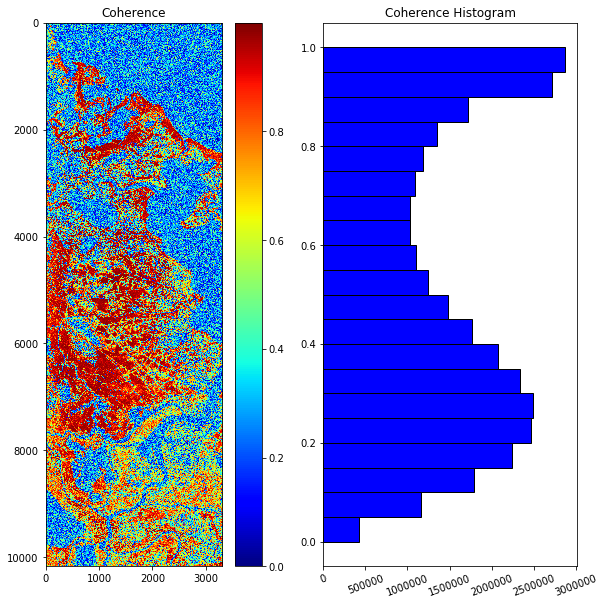

In [27]:
## 3. Inspect interferometric coherence.

# Generate histogram
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow(coh, interpolation='nearest', cmap = 'jet')
ax.set_title("Coherence")
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,2,2)
cax = ax.hist(coh.ravel(), bins=20, orientation="horizontal", fc='b', ec='k')
ax.set_title("Coherence Histogram")
ax.xaxis.set_tick_params(rotation=20)

plt.show()
plt.close("all")

### 4. Inspect wrapped phase.

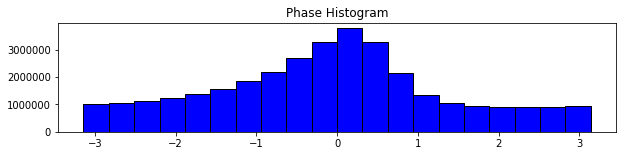

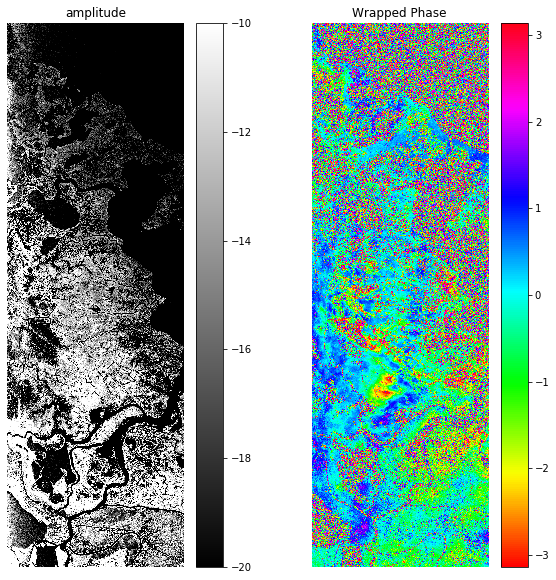

In [30]:
## 4. Inspect wrapped phase.

np.warnings.filterwarnings('ignore')

# Plot phase histogram
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1,1,1)
cax = ax.hist(w_int.ravel(), bins=20, orientation="vertical", fc='b', ec='k')
ax.set_title("Phase Histogram")

# Ifg Plot for visual inspection and amp for visual aid
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,2,1) # subplot
cax = ax.imshow(10*np.log10(amp), vmin=-20, vmax=-10, 
                interpolation='nearest', cmap = 'gray') # amplitude plotted in db
ax.set_title("amplitude")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,2,2) # subplot
cax = ax.imshow(w_int, interpolation='nearest', cmap='hsv')
ax.set_title("Wrapped Phase")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

amp=None;

### 5. Inspect unwrapped phase.

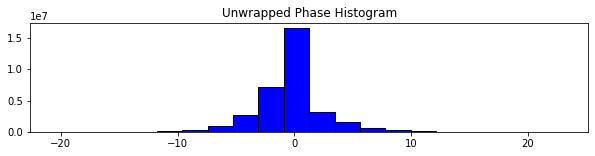

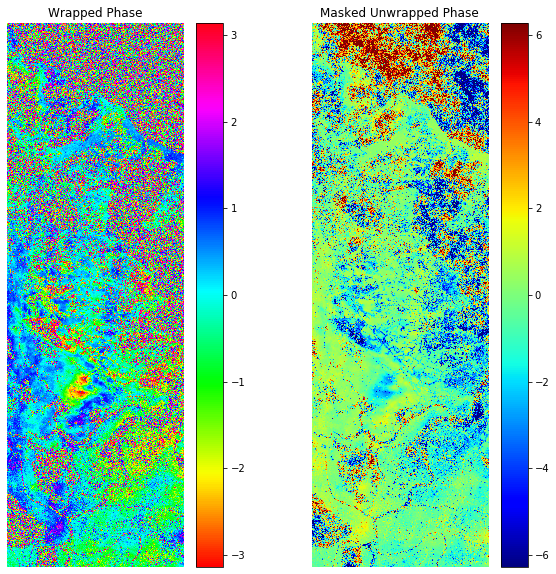

In [31]:
## 5. Inspect unwrapped phase.

# Plot unwrapped phase histogram
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1,1,1)
cax = ax.hist(unw_int.ravel(), bins=20, orientation="vertical", fc='b', ec='k')
ax.set_title("Unwrapped Phase Histogram")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,2,1) # subplot
cax = ax.imshow(w_int, interpolation='nearest', cmap='hsv')
ax.set_title("Wrapped Phase")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,2,2) # subplot
cax = ax.imshow(unw_int, vmin=-6.28, vmax=6.28, interpolation='nearest', cmap = 'jet')
ax.set_title("Masked Unwrapped Phase")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

### 6. Generate coherence mask.

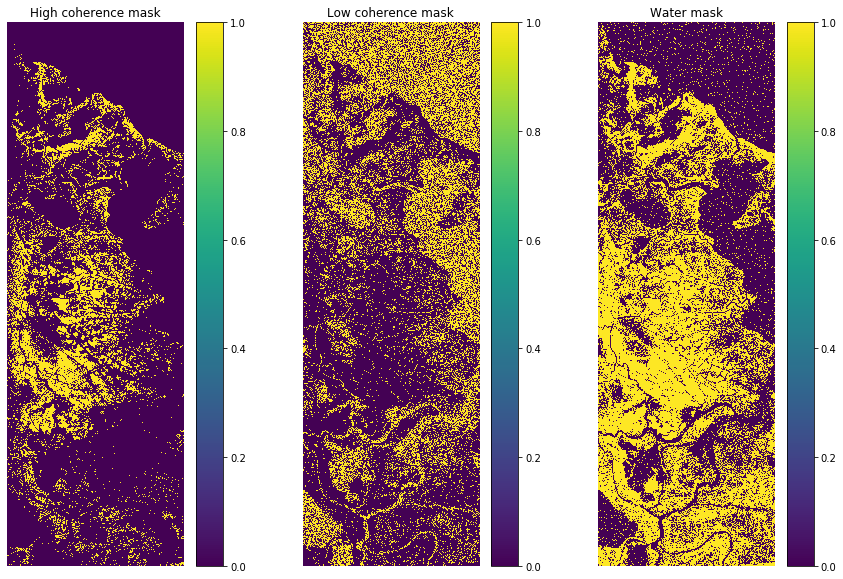

In [32]:
## 6. Generate coherence mask

high_coh_msk = (coh >= 0.9).astype(np.int)
low_coh_msk = (coh <= 0.3).astype(np.int)
water_msk = (coh >= 0.5).astype(np.int)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,3,1) # subplot
cax=ax.imshow(high_coh_msk, cmap='viridis', interpolation='nearest')
ax.set_title(r'High coherence mask')
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,3,2) # subplot
cax=ax.imshow(low_coh_msk, cmap='viridis', interpolation='nearest')
ax.set_title(r'Low coherence mask')
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,3,3) # subplot
cax=ax.imshow(water_msk, cmap='viridis', interpolation='nearest')
ax.set_title(r'Water mask')
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

high_coh_msk = None; low_coh_msk=None

### 7. Mask out water pixels from phase.

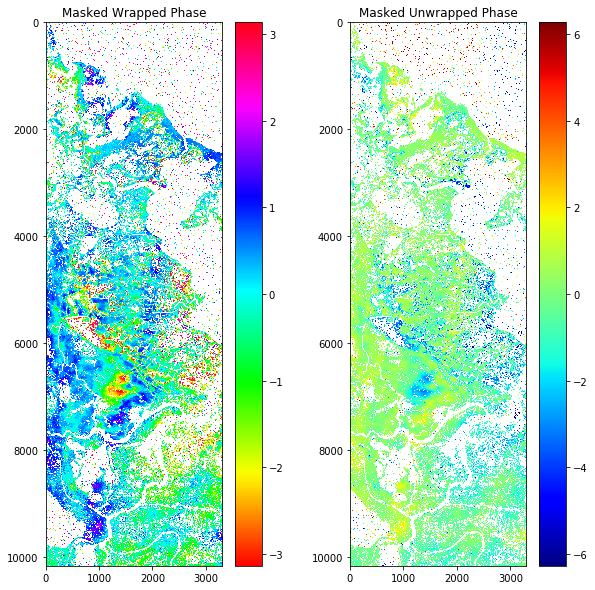

In [33]:
## 7. Mask out water pixels from phase.
w_int_msk = w_int*water_msk # apply mask
unw_int_msk = unw_int*water_msk # apply mask

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,2,1) # subplot
cax = ax.imshow(np.ma.masked_where(w_int_msk==0, w_int_msk), 
                interpolation='nearest', cmap='hsv')
ax.set_title("Masked Wrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')

ax = fig.add_subplot(1,2,2) # subplot
cax = ax.imshow(np.ma.masked_where(unw_int_msk==0, unw_int_msk), vmin=-6.28, vmax=6.28, 
                interpolation='nearest', cmap = 'jet')
ax.set_title("Masked Unwrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

w_int=None; unw_int=None; water_msk=None

### 8. Generate a profile from InSAR data.

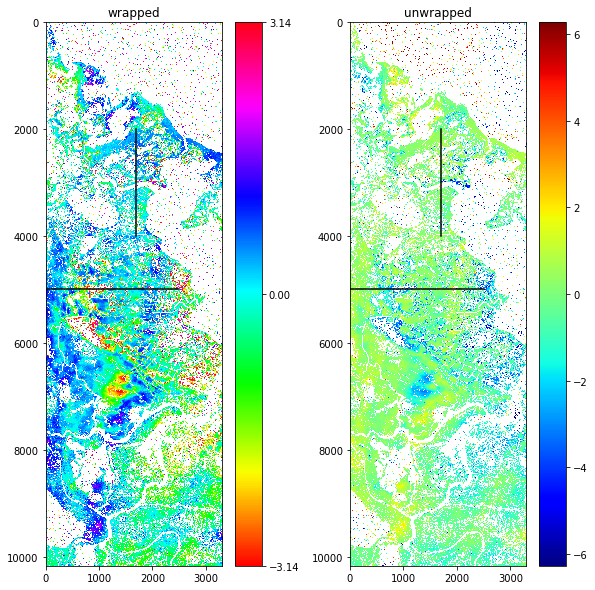

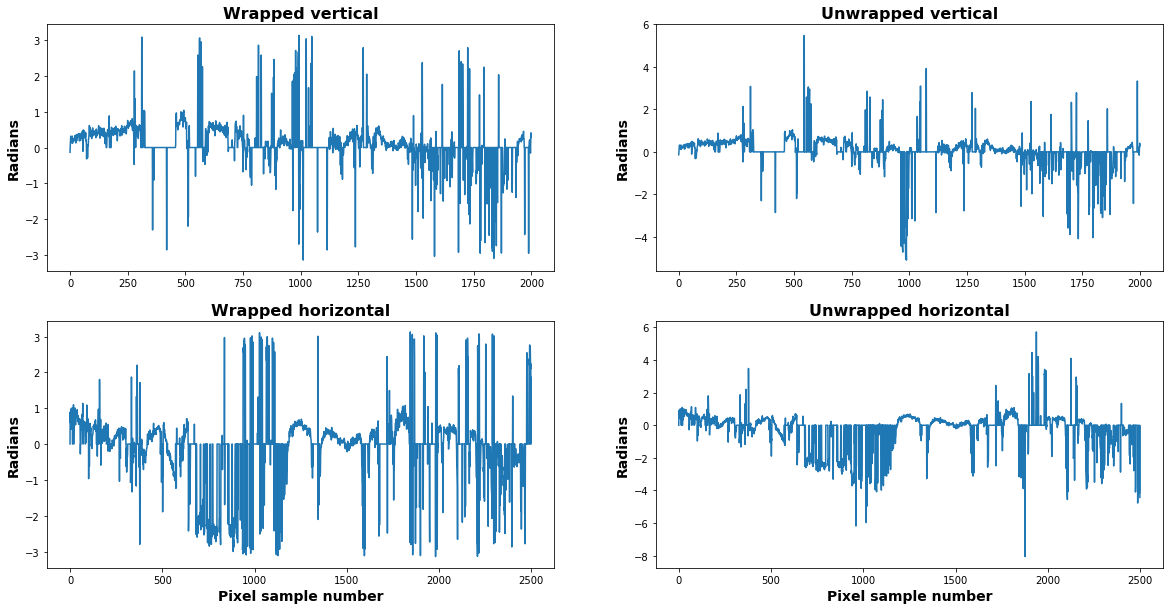

In [34]:
## 8. Generate a profile from InSAR data.

# Define profiles (we take one vertical and one horizontal for wrapped and unwrapped phase)
# Vertical profiles
pf_w_int_v = w_int_msk[2000:4000, 1700]
pf_unw_int_v = unw_int_msk[2000:4000, 1700]
# Horizontal profiles
pf_w_int_h = w_int_msk[5000, 0:2500]
pf_unw_int_h = unw_int_msk[5000, 0:2500]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,2,1)
cax=ax.imshow(np.ma.masked_where(w_int_msk==0, w_int_msk), 
              interpolation='nearest', cmap='hsv')
ax.plot([1700,1700],[2000,4000],'-k')
ax.plot([0,2500],[5000,5000],'-k')
ax.set_title("wrapped")
cbar = fig.colorbar(cax, ticks=[-3.14, 0, 3.14],orientation='vertical')
ax = fig.add_subplot(1,2,2)
cax=ax.imshow(np.ma.masked_where(unw_int_msk==0, unw_int_msk), vmin=-6.28, vmax=6.28, 
              interpolation='nearest', cmap='jet')
ax.plot([1700,1700],[2000,4000],'-k')
ax.plot([0,2500],[5000,5000],'-k')
ax.set_title("unwrapped")
cbar = fig.colorbar(cax,orientation='vertical')
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,2,1)
cax=ax.plot(pf_w_int_v)
ax.set_title("Wrapped vertical", fontweight='bold', fontsize=16)
# plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
ax = fig.add_subplot(2,2,2)
cax=ax.plot(pf_unw_int_v)
ax.set_title("Unwrapped vertical", fontweight='bold', fontsize=16)
# plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
ax = fig.add_subplot(2,2,3)
cax=ax.plot(pf_w_int_h)
ax.set_title("Wrapped horizontal", fontweight='bold', fontsize=16)
plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
ax = fig.add_subplot(2,2,4)
cax=ax.plot(pf_unw_int_h)
ax.set_title("Unwrapped horizontal", fontweight='bold', fontsize=16)
plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
plt.show()

plt.show()
plt.close("all")

## Exploring L2 interferogram products

### L2 Data Characteristics

#### Link to dataset
https://daac.ornl.gov/DELTAX/guides/DeltaX_L2_UAVSAR_WaterLevels.html

#### Data File Information
UAVSAR Level 2 (L2) dataset contains georeferenced interferometric products for all the acquired Delta-X flight lines.
This dataset includes a total of 1,924 files in ENVI binary image and associated header file format: 481 interferogram phase, 481 interferogram amplitude, 481 coherence, and 481 unwrapped interferogram phase. Each ENVI consist of a binary data file (*.dat) plus a metadata header file (*.hdr); the data file and its associated header are provided in a zip archive (*.zip).

- Spatial Coverage:  Atchafalaya River and Terrebonne Basins in southern Louisiana
- Spatial Resolution: 0.000063 degrees (approximately 6 m)
- Temporal Coverage:  2021-03-27 to 2021-04-18 and 2021-09-05 to 2021-09-13
- Temporal Resolution: estimates at 30-minute intervals
- File naming convention:
    - Interferogram Phase naming convention: ssssss_IIIII_YYLLDDHHMM_yyllddhhmm_vv_intphase.grd.dat
    - Interferogram Amplitude naming convention: ssssss_IIIII_YYLLDDHHMM_yyllddhhmm_vv_intamp.grd.dat
    - Coherence naming convention: ssssss_IIIII_YYLLDDHHMM_yyllddhhmm_vv_coh.grd.dat
    - Unwrapped Interferogram Phase naming convention: ssssss_IIIII_YYLLDDHHMM_yyllddhhmm_vv_unwphase.grd.dat
- File extension indicating the file type (georeferenced = grd.dat)
- The field ‘vv’ accounts for different versions of the products, which can be used, e.g., to cover different areas cropped from the full scene. 

 <p align="left">
  <img width="1000" src="images/uavsar_l2_browse.png"> 
</p> 
<p style="text-align: center;">
    (UAVSAR L2 products)
</p>


### Download sample data
Download sample data from ORNL.

 <p align="left">
  <img width="600" src="images/uavsar_l2_dload.png"> 
  <img width="600" src="images/uavsar_l2_dload2.png">
  <img width="600" src="images/uavsar_l2_dload3.png">
</p> 
<p style="text-align: center;">
    (Data used in this example )
</p>

### For this example we explore the L2 InSAR data
    1. Initialize the notebook using the necessary libraries. 
    2. Read rasters.
    3. Inspect interferometric coherence.
    4. Inspect wrapped phase.
    5. Inspect unwrapped phase.
    6. Generate coherence mask.
    7. Mask out water pixels from phase.
    8. Generate a profile from InSAR data.

### 1. Initialize the notebook using the necessary libraries. 
### it has been initialized in the section 1. of the L1B data. 

### 2. Read rasters.

In [35]:
## 2. Read rasters.

# Verify paths to data
!ls uavsar_l2/
# Separator for visual aid 
print('--------------------------')
# Separator for visual aid 
print('--------------------------')
# take a look at data info usign gdal
!gdalinfo uavsar_l2/wterre_34202_2104061800_2104062032_01_intphase.grd.dat


wterre_34202_2104061800_2104062032_01_coh.grd.dat
wterre_34202_2104061800_2104062032_01_coh.grd.dat.hdr
wterre_34202_2104061800_2104062032_01_intamp.grd.dat
wterre_34202_2104061800_2104062032_01_intamp.grd.dat.hdr
wterre_34202_2104061800_2104062032_01_intphase.grd.dat
wterre_34202_2104061800_2104062032_01_intphase.grd.dat.hdr
wterre_34202_2104061800_2104062032_02_unwphase.grd.dat
wterre_34202_2104061800_2104062032_02_unwphase.grd.dat.hdr
--------------------------
--------------------------
Driver: ENVI/ENVI .hdr Labelled
Files: uavsar_l2/wterre_34202_2104061800_2104062032_01_intphase.grd.dat
       uavsar_l2/wterre_34202_2104061800_2104062032_01_intphase.grd.dat.hdr
Size is 8008, 12732
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EP

In [16]:
# Read rasters

amp_path = 'uavsar_l2/wterre_34202_2104061800_2104062032_01_intamp.grd.dat'
ds = gdal.Open(amp_path, gdal.GA_ReadOnly)
geo_amp = ds.GetRasterBand(1).ReadAsArray()
ds = None

int_path = 'uavsar_l2/wterre_34202_2104061800_2104062032_01_intphase.grd.dat'
ds = gdal.Open(int_path, gdal.GA_ReadOnly)
geo_w_int = ds.GetRasterBand(1).ReadAsArray()
ds = None

coh_path = 'uavsar_l2/wterre_34202_2104061800_2104062032_01_coh.grd.dat'
ds = gdal.Open(coh_path, gdal.GA_ReadOnly)
geo_coh = ds.GetRasterBand(1).ReadAsArray()
ds = None

ds = gdal.Open("uavsar_l2/wterre_34202_2104061800_2104062032_02_unwphase.grd.dat", gdal.GA_ReadOnly)
geo_unw_int = ds.GetRasterBand(1).ReadAsArray()
# Print info from the data we are reading
# Description
print('Description ', ds.GetDescription())
print('------------------------------') # separator for visual aid
# Projection
print('Projection ', ds.GetProjection())
print('------------------------------') # separator for visual aid
# Dimensions
print('Dimensions x,y ', ds.RasterXSize, ds.RasterYSize)
print('------------------------------') # separator for visual aid
# Number of bands
print('Bands ', ds.RasterCount)
print('------------------------------') # separator for visual aid
# Geo info
print('Geo info', ds.GetGeoTransform())



Description  uavsar_l2/wterre_34202_2104061800_2104062032_02_unwphase.grd.dat
------------------------------
Projection  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]
------------------------------
Dimensions x,y  8008 12732
------------------------------
Bands  1
------------------------------
Geo info (-91.3517976749, 5.556e-05, -0.0, 29.7799110289, -0.0, -5.556e-05)


In [17]:
## We will use the raster size later so we save them
length, width = ds.RasterYSize, ds.RasterXSize

# We also save the raster geo info to use them for plotting later 
# ulx, uly stands for upper left corner, lrx, lry for lower right corner
ulx, xres, xskew, uly, yskew, yres  = ds.GetGeoTransform()
lrx = ulx + (width * xres)
lry = uly + (length * yres)
print('Raster geo corners = ', ulx, uly, lrx, lry)

# this empties the gdal raster variable that we no longer need since the raster has been saved into and array
ds = None 


Raster geo corners =  -91.3517976749 29.7799110289 -90.9068731949 29.0725211089


### 3. Inspect interferometric coherence.

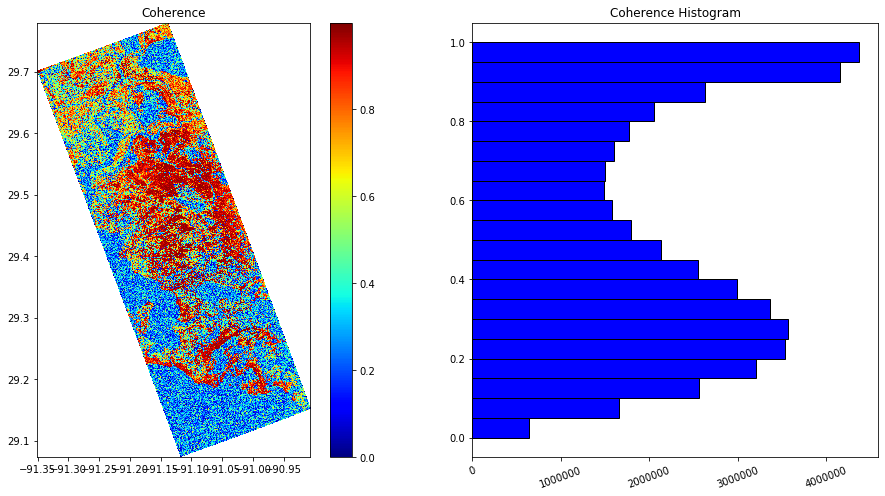

In [18]:
## 3. Inspect interferometric coherence.

# Define geo corners, use them to plot using lat lon coordinates instead of pixel coordinates
geo_corners = (ulx, lrx, lry, uly) 

# Generate histogram
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow(geo_coh, extent=geo_corners, interpolation='nearest', cmap = 'jet')
ax.set_title("Coherence")
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,2,2)
cax = ax.hist(geo_coh.ravel(), bins=20, orientation="horizontal", fc='b', ec='k')
ax.set_title("Coherence Histogram")
ax.xaxis.set_tick_params(rotation=20)

plt.show()
plt.close("all")

### 4. Inspect wrapped phase.

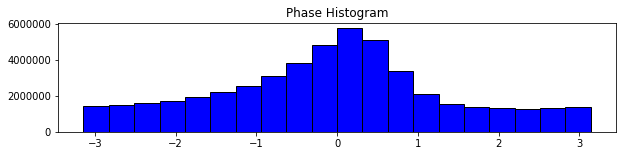

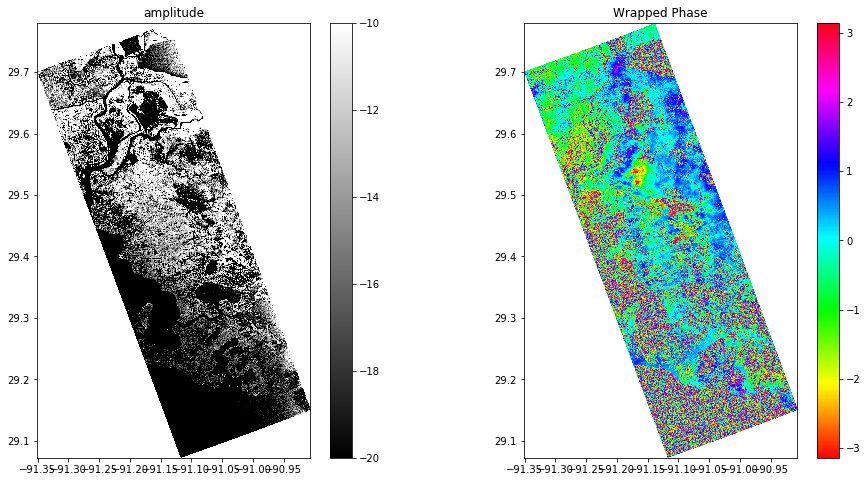

In [19]:
## 4. Inspect wrapped phase.

# Plot phase histogram
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1,1,1)
cax = ax.hist(geo_w_int.ravel(), bins=20, orientation="vertical", fc='b', ec='k')
ax.set_title("Phase Histogram")

# Ifg Plot for visual inspection and amp for visual aid
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,2,1) # subplot
cax = ax.imshow(10*np.log10(geo_amp), extent=geo_corners, vmin=-20, vmax=-10, 
                interpolation='nearest',cmap = 'gray') # amplitude plotted in db
ax.set_title("amplitude")
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,2,2) # subplot
cax = ax.imshow(geo_w_int, extent=geo_corners, interpolation='nearest', cmap='hsv')
ax.set_title("Wrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

geo_amp = None

### 5. Inspect unwrapped phase.

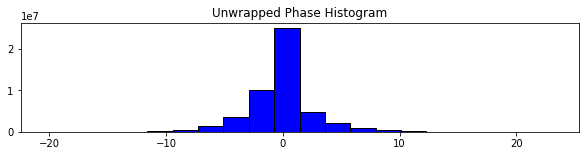

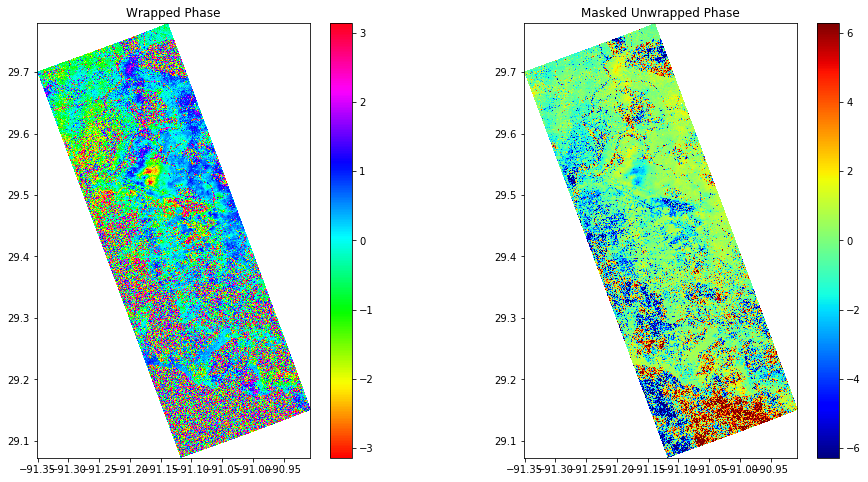

In [20]:
## 5. Inspect unwrapped phase.

# Plot unwrapped phase histogram
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1,1,1)
cax = ax.hist(geo_unw_int.ravel(), bins=20, orientation="vertical", fc='b', ec='k')
ax.set_title("Unwrapped Phase Histogram")

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,2,1) # subplot
cax = ax.imshow(geo_w_int, extent=geo_corners, interpolation='nearest', cmap='hsv')
ax.set_title("Wrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,2,2) # subplot
cax = ax.imshow(geo_unw_int, extent=geo_corners, vmin=-6.28, vmax=6.28, interpolation='nearest', cmap = 'jet')
ax.set_title("Masked Unwrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

### 6. Generate coherence mask.

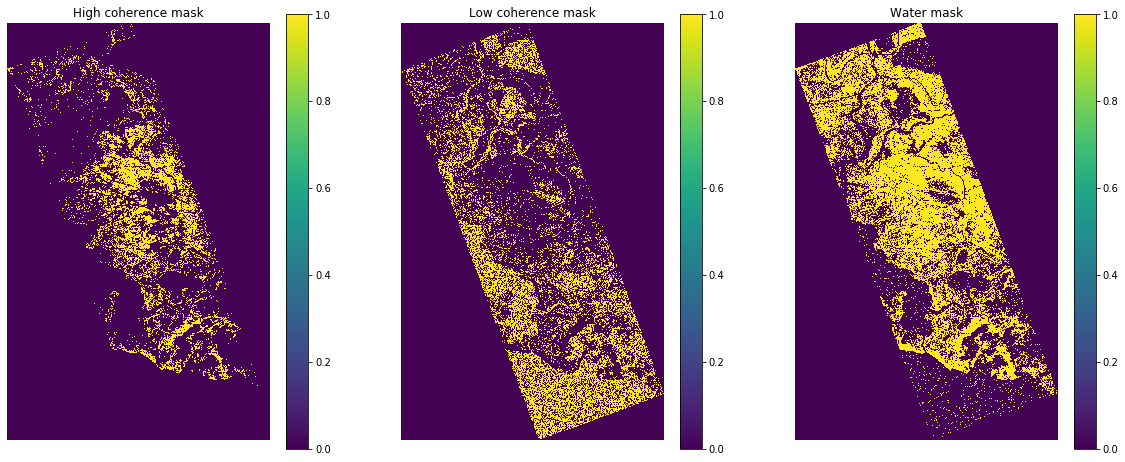

In [36]:
## 6. Generate coherence mask

geo_high_coh_msk = (geo_coh >= 0.9).astype(np.int)
geo_low_coh_msk = (geo_coh <= 0.3).astype(np.int)
geo_water_msk = (geo_coh >= 0.5).astype(np.int)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1,3,1) # subplot
cax=ax.imshow(geo_high_coh_msk, cmap='viridis', extent=geo_corners, interpolation='nearest')
ax.set_title(r'High coherence mask')
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,3,2) # subplot
cax=ax.imshow(geo_low_coh_msk, cmap='viridis', extent=geo_corners, interpolation='nearest')
ax.set_title(r'Low coherence mask')
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')
ax = fig.add_subplot(1,3,3) # subplot
cax=ax.imshow(geo_water_msk, cmap='viridis', extent=geo_corners, interpolation='nearest')
ax.set_title(r'Water mask')
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

geo_high_coh_msk = None; geo_low_coh_msk = None

### 7. Mask out water pixels from phase.

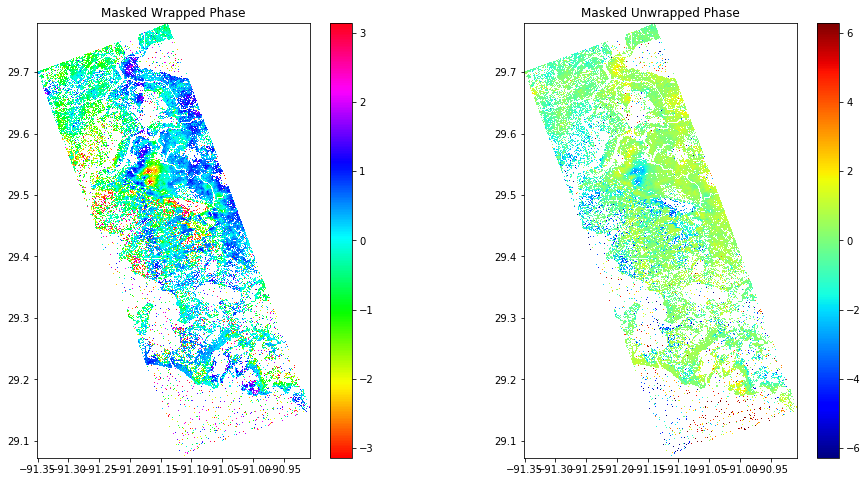

In [37]:
## 7. Mask out water pixels from phase.
geo_w_int_msk = geo_w_int*geo_water_msk # apply mask
geo_unw_int_msk = geo_unw_int*geo_water_msk # apply mask

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,2,1) # subplot
cax = ax.imshow(np.ma.masked_where(geo_w_int_msk==0, geo_w_int_msk), extent=geo_corners, 
                interpolation='nearest', cmap='hsv')
ax.set_title("Masked Wrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')

ax = fig.add_subplot(1,2,2) # subplot
cax = ax.imshow(np.ma.masked_where(geo_unw_int_msk==0, geo_unw_int_msk), vmin=-6.28, vmax=6.28, 
                extent=geo_corners, interpolation='nearest', cmap = 'jet')
ax.set_title("Masked Unwrapped Phase")
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

geo_w_int = None; geo_unw_int=None; geo_water_msk=None

### 8. Generate a profile from InSAR data.

In [38]:
## 8. Generate a profile from InSAR data.
## Function to extrat pixel coordinates from lat lon

def get_pixel_coord(lon, lat):
    pixel_coord_x = int((lon - ulx)/xres) 
    pixel_coord_y = int((lat - uly)/yres)
    
    return pixel_coord_x, pixel_coord_y

## Use the funtion to trasform the needed coordinates for our profile
pc_x1, pc_y1 = get_pixel_coord(-91.12, 29.3)
print('Raster pixel coords x, y = ', pc_x1, pc_y1)

pc_x2, pc_y2 = get_pixel_coord(-91.12, 29.2)
print('Raster pixel coords x, y = ', pc_x2, pc_y2)


Raster pixel coords x, y =  4172 8637
Raster pixel coords x, y =  4172 10437


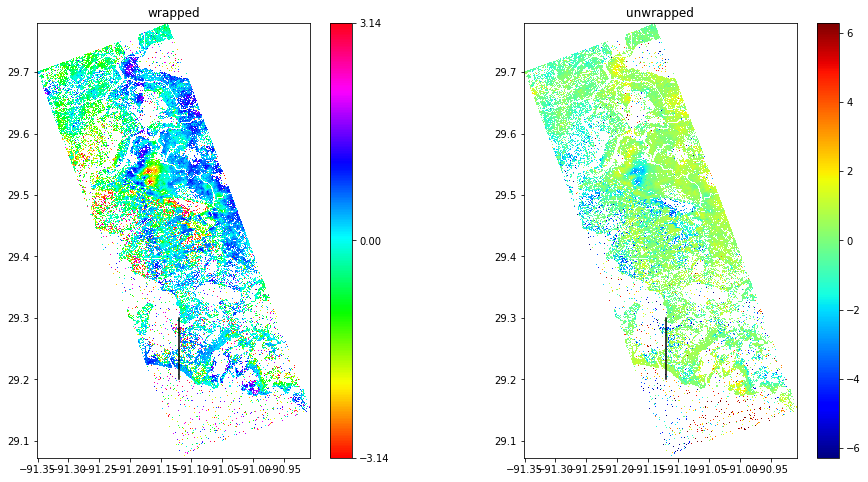

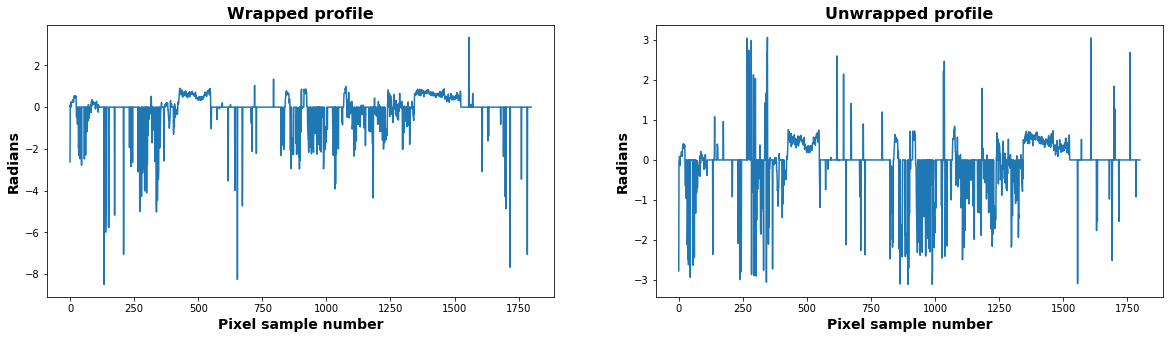

In [24]:
# Define profile for wrapped and unwrapped phase
# Vertical profiles
geo_pf_w_int = geo_w_int_msk[8637:10437, 4172]
geo_pf_unw_int = geo_unw_int_msk[8637:10437, 4172]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,2,1)
cax=ax.imshow(np.ma.masked_where(geo_w_int_msk==0, geo_w_int_msk), extent=geo_corners, 
              interpolation='nearest', cmap='hsv')
ax.plot([-91.12, -91.12],[29.3, 29.2],'-k')
ax.set_title("wrapped")
cbar = fig.colorbar(cax, ticks=[-3.14, 0, 3.14],orientation='vertical')
ax = fig.add_subplot(1,2,2)
cax=ax.imshow(np.ma.masked_where(geo_unw_int_msk==0, geo_unw_int_msk), extent=geo_corners, 
              interpolation='nearest', vmin=-6.28, vmax=6.28, cmap='jet')
ax.plot([-91.12, -91.12],[29.3, 29.2],'-k')
ax.set_title("unwrapped")
cbar = fig.colorbar(cax,orientation='vertical')
plt.show()

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
cax=ax.plot(geo_pf_unw_int)
ax.set_title("Wrapped profile", fontweight='bold', fontsize=16)
plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
ax = fig.add_subplot(1,2,2)
cax=ax.plot(geo_pf_w_int)
ax.set_title("Unwrapped profile", fontweight='bold', fontsize=16)
plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
plt.show()
plt.close("all")

geo_pf_w_int = None; geo_pf_unw_int = None

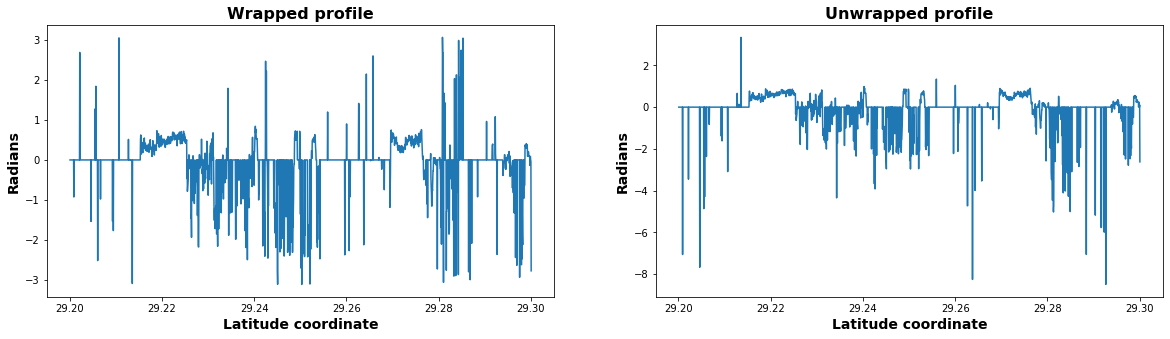

In [25]:
## We can also generate the profile plot using lat lon reference as shown below:

# Take the insar sample profile
geo_pf_w_int = geo_w_int_msk[8637:10437, 4172]
geo_pf_unw_int = geo_unw_int_msk[8637:10437, 4172]

# Convert it into a list
geo_pf_w_int = np.ndarray.tolist(geo_pf_w_int)
geo_pf_unw_int = np.ndarray.tolist(geo_pf_unw_int)

# Create a list of the profile pixel coordinates
pixel_nums = list(range(8637, 10437))

# Transform those pixel coordinates into lat or lon (depending the profile direction.
# In this example the pixels correspond to latitude.
lat_wlc_pf = []
for pix in pixel_nums:
    lat = uly + (pix * yres)
    lat_wlc_pf.append(lat)
    lat = None
pixel_nums = None
    
# Generate plot
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
cax=ax.plot(lat_wlc_pf, geo_pf_w_int)
ax.set_title("Wrapped profile", fontweight='bold', fontsize=16)
plt.xlabel("Latitude coordinate", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
ax = fig.add_subplot(1,2,2)
cax=ax.plot(lat_wlc_pf, geo_pf_unw_int)
ax.set_title("Unwrapped profile", fontweight='bold', fontsize=16)
plt.xlabel("Latitude coordinate", fontweight='bold', fontsize=14)
plt.ylabel("Radians", fontweight='bold', fontsize=14)
plt.show()
plt.close("all")

lat_wlc_pf = None; geo_pf_w_int = None; geo_pf_unw_int = None